# Final Project -- Glassdoor Job Reviews

##  Group 2 : Andrew Leong, Benson Chen, Lotus Liu, Jay Zhu, Naomi Wong


# Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn as sk
import sklearn.tree as tree

from IPython.display import Image  
import pydotplus
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%autosave 400

Autosaving every 400 seconds


In [4]:
df = pd.read_csv("glassdoor_reviews.csv", index_col=0)

# 1. Data Description

The dataset contains company reviews left on the job search platform Glassdoor with 838566 rows and 20 columns. Each row correspinds to a employee review.

#### Columns:
<ol>
<li><b>column label</b>: column identifiers (N/A - not relevant to dataset)
<li><b>firm</b>: firm that is reviewed
<li><b>date_review</b>: date of the review
<li><b>job title</b>: job title of the reviewer
<li><b>current</b>: current status of the employee (former or current)
<li><b>location</b>: job location (Hong Kong, New York, England, London)
<li><b>overall rating</b>: overall rating of the firm (scale of 1 to 5)
<li><b>work_life_balance</b>: worklife balance rating (scale of 1 to 5)
<li><b>culture_values</b>: culture and values rating (scale of 1 to 5)
<li><b>diversity_inclusion</b>: diversity and inclusion rating (scale 1 to 5)
<li><b>career_opp</b>: career opportunities rating (scale 1 to 5)
<li><b>comp_benefits</b>: compensation and benefits rating (scale 1 to 5)
<li><b>senior_mgmt</b>: senior management rating (scale 1 to 5)
<li><b>recommend</b>: reviewer reccomendation (v - Positive, x - Negative, o - No opinion)
<li><b>ceo_approv</b>: reveiwer approval of the CEO (v - Positive, r - Mild, x - Negative, o - No opinion)
<li><b>outlook</b>: reviewer outlook of the firm (v - Positive, r - Mild, x - Negative, o - No opinion)
<li><b>headline</b>: headline of the review (string)
<li><b>pros</b>: pros (string)
<li><b>cons</b>: cons (string)
<li><b>use</b>: N/A - all null values
</ol>

# 2. Understanding the data 

In [5]:
# columns in the dataset
df.columns

Index(['column_label', 'firm', 'date_review', 'job_title', 'current',
       'location', 'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'use'],
      dtype='object')

In [6]:
# check the data shape and info
df.shape
df.info()

(838566, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838566 entries, 1 to 838566
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   column_label         838566 non-null  int64  
 1   firm                 838566 non-null  object 
 2   date_review          838566 non-null  object 
 3   job_title            838566 non-null  object 
 4   current              838566 non-null  object 
 5   location             541228 non-null  object 
 6   overall_rating       838566 non-null  int64  
 7   work_life_balance    688672 non-null  float64
 8   culture_values       647193 non-null  float64
 9   diversity_inclusion  136066 non-null  float64
 10  career_opp           691065 non-null  float64
 11  comp_benefits        688484 non-null  float64
 12  senior_mgmt          682690 non-null  float64
 13  recommend            838566 non-null  object 
 14  ceo_approv           838566 non-null  object 
 15  outlook          

In [7]:
# first few reviews of the dataset
df.head(3)

,column_label,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use
1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN
2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,4.0,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN
3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN


In [8]:
# check for null values
df.isna().sum()

column_label                0
firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
use                    838566
dtype: int64

In [9]:
# Check the variables
df.job_title.unique()
df.current.unique()
df['location'].unique()
df['overall_rating'].unique()
df['work_life_balance'].unique()
df.culture_values.unique()
df.diversity_inclusion.unique()
df.career_opp.unique()
df.comp_benefits.unique()
df.senior_mgmt.unique()
df.recommend.unique()
df.ceo_approv.unique()
df.outlook.unique()

array([' Financial Analyst', ' Administrator',
       ' Client Services Representative', ..., ' Senior Policy Analyst',
       ' Solution Architect Corporate IT', ' DASO Jobcentre'],
      dtype=object)

array(['Former Employee, more than 1 year', 'Former Employee',
       'Current Employee', 'Current Employee, less than 1 year',
       'Former Employee, less than 1 year',
       'Former Employee, more than 5 years',
       'Current Employee, more than 1 year',
       'Former Employee, more than 10 years',
       'Former Employee, more than 3 years',
       'Current Employee, more than 3 years',
       'Current Employee, more than 5 years',
       'Former Employee, more than 8 years',
       'Current Employee, more than 10 years',
       'Current Employee, more than 8 years',
       'Current Contractor, more than 1 year',
       'KEY NOT FOUND: jobLine.temporary-former',
       'KEY NOT FOUND: jobLine.per_diem-former',
       'Current Contractor, less than 1 year',
       'Current Freelancer, more than 3 years', 'Former Contractor',
       'Former Contractor, less than 1 year',
       'Former Intern, more than 1 year',
       'Former Contractor, more than 1 year',
       'Former Intern

array(['New York, NY', 'Hong Kong', 'London, England, England', ...,
       'Truro, VA', 'Fylde, England, England',
       'Bacolod, Bacolod, Bacolod'], dtype=object)

array([1, 4, 3, 5, 2])

array([ 1.,  4.,  5.,  2.,  3., nan])

array([ 1.,  5.,  4.,  2.,  3., nan])

array([ 1.,  4.,  3.,  2., nan,  5.])

array([ 1.,  3.,  5.,  2., nan,  4.])

array([ 2.,  4.,  3.,  1., nan,  5.])

array([ 1.,  4.,  5.,  3.,  2., nan])

array(['x', 'o', 'v'], dtype=object)

array(['r', 'o', 'v', 'x'], dtype=object)

array(['x', 'o', 'v', 'r'], dtype=object)

In [10]:
# Check the number of catergories of variables
df.job_title.nunique()
df.current.nunique()
df['location'].nunique()
df['overall_rating'].nunique()
df['work_life_balance'].nunique()
df.culture_values.nunique()
df.diversity_inclusion.nunique()
df.career_opp.nunique()
df.comp_benefits.nunique()
df.senior_mgmt.nunique()
df.recommend.nunique()
df.ceo_approv.nunique()
df.outlook.nunique()

62275

29

14487

5

5

5

5

5

5

5

3

4

4

In [11]:
for c in df.columns:
    print(c + ' ' + str(df[c].nunique()))

column_label 6044
firm 428
date_review 4813
job_title 62275
current 29
location 14487
overall_rating 5
work_life_balance 5
culture_values 5
diversity_inclusion 5
career_opp 5
comp_benefits 5
senior_mgmt 5
recommend 3
ceo_approv 4
outlook 4
headline 390455
pros 778560
cons 777134
use 0


# 3. Exploratory Data Analysis 

In [12]:
# First we look at the description of the data
df.overall_rating.describe()
df.work_life_balance.describe()
df.culture_values.describe()
df.diversity_inclusion.describe()
df.career_opp.describe()
df.comp_benefits.describe()
df.senior_mgmt.describe()

count    838566.000000
mean          3.655956
std           1.174684
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall_rating, dtype: float64

count    688672.000000
mean          3.375735
std           1.305874
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: work_life_balance, dtype: float64

count    647193.000000
mean          3.590164
std           1.323280
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: culture_values, dtype: float64

count    136066.000000
mean          3.966612
std           1.190937
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: diversity_inclusion, dtype: float64

count    691065.000000
mean          3.461825
std           1.271295
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: career_opp, dtype: float64

count    688484.000000
mean          3.398109
std           1.218738
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: comp_benefits, dtype: float64

count    682690.000000
mean          3.176576
std           1.330720
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: senior_mgmt, dtype: float64

<AxesSubplot:xlabel='overall_rating', ylabel='count'>

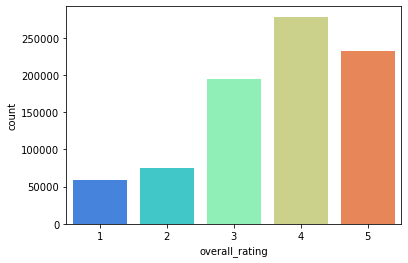

In [13]:
# Check the distribution of overall_rating since we are primarily interested in this variable

sns.countplot(x=df['overall_rating'], palette='rainbow')

We also create another binary variable to determine a high rating (4 and 5) with low rating (1, 2, 3)

In [14]:
#If rating is a 4 or a 5, that is considered high rating
df['high_rating'] = ((df.overall_rating == 4) | (df.overall_rating == 5)) * 1

In [15]:
df.high_rating.value_counts()

1    510532
0    328034
Name: high_rating, dtype: int64

let's find something about the firms.

In [16]:
df.firm.nunique()

428

In [17]:
#find the top 10 companies that have the most interviewing information
df.groupby('firm')['firm'].count().nlargest(10)

firm
IBM           60436
McDonald-s    49450
Deloitte      46995
EY            34050
PwC           33227
Oracle        31941
Microsoft     26675
J-P-Morgan    25814
KPMG          24815
Apple         20797
Name: firm, dtype: int64

In this dataset, the interviewed employees come from 428 companies and the top 10 compnies that have the most interview information were from IBM ,McDonld-s, Deloitte, EY, PwC, Oracle, Microsoft, J-P-Morgan, KPMG and Apple.

In [18]:
#find the top 10 overall_rating companies
df.groupby('firm')['overall_rating'].mean().nlargest(10)

firm
The-Survey-Association    5.000000
Time-Etc                  4.785714
Northern-Gas-and-Power    4.719682
CarShop-UK                4.651163
Michelmores               4.610390
Bain-and-Company          4.559757
Gateley                   4.540984
Kingsley-Healthcare       4.500000
Sport-England             4.500000
Taylor-Wimpey             4.497396
Name: overall_rating, dtype: float64

In [19]:
#find the number of interviewed employees from the top 10 overall_rating companies
len(df[df.firm == 'The-Survey-Association'])
len(df[df.firm == 'Time-Etc'])
len(df[df.firm == 'Northern-Gas-and-Power'])
len(df[df.firm == 'CarShop-UK'])
len(df[df.firm == 'Michelmores'])
len(df[df.firm == 'Bain-and-Company'])
len(df[df.firm == 'Gateley'])
len(df[df.firm == 'Kingsley-Healthcare'])
len(df[df.firm == 'Sport-England'])
len(df[df.firm == 'Taylor-Wimpey'])

3

42

503

258

77

3623

61

122

24

384

The highest overall_rating company has only three rows of data, also the top 10 rated companies have very few rows of data compared to the whole dataset. We should not assume these are best the companies to work for as the small amount of data might skew the ratings.

# 4. Data Cleaning

## 4.1 Drop NaNs

In [20]:
df.isna().sum()
df.isna().sum().sum()

column_label                0
firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
use                    838566
high_rating                 0
dtype: int64

2635357

In [21]:
#check the ratio of Nan in each column
df.isna().any()
df.location.isna().sum()/len(df.location)
df.work_life_balance.isna().sum()/len(df.work_life_balance)
df.culture_values.isna().sum()/len(df.culture_values)
df.diversity_inclusion.isna().sum()/len(df.diversity_inclusion)
df.career_opp.isna().sum()/len(df.career_opp)
df.comp_benefits.isna().sum()/len(df.comp_benefits)
df.senior_mgmt.isna().sum()/len(df.senior_mgmt)
df.headline.isna().sum()/len(df.headline)

column_label           False
firm                   False
date_review            False
job_title              False
current                False
location                True
overall_rating         False
work_life_balance       True
culture_values          True
diversity_inclusion     True
career_opp              True
comp_benefits           True
senior_mgmt             True
recommend              False
ceo_approv             False
outlook                False
headline                True
pros                   False
cons                    True
use                     True
high_rating            False
dtype: bool

0.35457912674732817

0.17875039054767305

0.22821459491560592

0.8377396650949359

0.17589670938244575

0.17897458279968423

0.18588399720475193

0.002646184080919093

From the above calculation, we could not drop the NaN rows in column (diversity_inclusion) because NaN occupies almost 84% of the total values in the column. So we can only drop NaN in the column of location,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt and headline.

We agree to drop the columns that have a majority of NA values.

In [22]:
df2 = df.copy()

In [23]:
#We see that column USE is filled with NAN values. We completely remove
df2.drop(columns="use",inplace=True)
#We drop diversity inclusion becuase of the 84% NA Values
df2.drop(columns='diversity_inclusion',inplace=True)
#We drop column label because it has no meaning
df2.drop(columns="column_label",inplace=True)

In [24]:
df2.location.fillna('',inplace=True) #For the 297,338 NAN values in Location, we replace with ''
df2.cons.fillna('',inplace=True) #For the 8 NAN values in cons, we replace with ''
df2.headline.fillna('',inplace=True) #For the 2,219 NAN values in headline, we replace with ''
df2.job_title.replace(to_replace=" ",value=" anonymous employee",inplace=True)

For the remaining columns with null values, they are supposed to contain a rating from 1 to 5. Replacing these values with an integer such as 0 will skew the data. Therefore we will drop the rows with null values in these columns.

In [25]:
# drop rows where 'culture_values' is NaN
df2.dropna(how='any', subset=['culture_values'], inplace=True)
# drop rows where 'comp_benefits' is NaN
df2.dropna(how='any', subset=['comp_benefits'], inplace=True)
# drop rows where 'senior_mgmt' is NaN
df2.dropna(how='any', subset=['senior_mgmt'], inplace=True)
# drop rows where 'culture_values' is NaN
df2.dropna(how='any', subset=['career_opp'], inplace=True)
# drop rows where 'work_life_balance' is NaN
df2.dropna(how='any', subset=['work_life_balance'], inplace=True)

In [26]:
df2.isna().sum()

firm                 0
date_review          0
job_title            0
current              0
location             0
overall_rating       0
work_life_balance    0
culture_values       0
career_opp           0
comp_benefits        0
senior_mgmt          0
recommend            0
ceo_approv           0
outlook              0
headline             0
pros                 0
cons                 0
high_rating          0
dtype: int64

In [27]:
# check that we still have an adequate amount of rows and columns left
print("dataset afert cleaning: ") 
df2.shape
print("original dataset: ") 
df.shape
#We dropped these rows
print("total rows dropped ")
(len(df) - len(df2))

dataset afert cleaning: 


(637409, 18)

original dataset: 


(838566, 21)

total rows dropped 


201157

## 4.2 Data Manipulation

In [28]:
df = df2

Convert the 'recommend', 'ceo_approv', and 'outlook' column values to make it easier to understand:
<ul>
<li><b>x</b>: -1 (for negative sentiment)
<li><b>v</b>: 1 (for positive sentiment)
<li><b>r and o </b>: 0 (for neutral and no opinoin sentiment)
</ul>

In [29]:
# convert reccomend values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['recommend'] = df['recommend'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)
# convert 'ceo_approv' values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['ceo_approv'] = df['ceo_approv'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)
# convert 'outlook' values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['outlook'] = df['outlook'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)

In [30]:
# check if cleaning steps worked
df[['recommend', 'ceo_approv', 'outlook']].head()

,recommend,ceo_approv,outlook
1,-1,0,-1
2,0,0,0
3,1,1,1
4,0,0,0
5,1,0,1


We want to make all the string values to be lower capitalization

In [31]:
df.pros = df.pros.apply(lambda x: x.lower())
df.cons = df.cons.astype('str') 
df.cons = df.cons.apply(lambda x: x.lower())
df.headline = df.headline.astype('str') 
df.headline = df.headline.apply(lambda x: x.lower())
df.job_title = df.job_title.astype('str') 
df.job_title = df.job_title.apply(lambda x: x.lower())
df.location = df.location.astype('str') 
df.location = df.location.apply(lambda x: x.lower())
df.firm = df.firm.apply(lambda x: x.lower())

In [32]:
# rename the 'current' column to 'work_status'
df.rename(columns = {'current':'work_status'},inplace = True)

In [33]:
# create a new column work_status1 to define current and former employees
df['current_employee'] = df.work_status.apply(lambda x: 1.0 if 'Current Employee'in x else 0.0)
df['current_employee']

1         0.0
2         0.0
3         0.0
4         1.0
5         1.0
         ... 
838550    1.0
838551    0.0
838552    1.0
838554    1.0
838555    1.0
Name: current_employee, Length: 637409, dtype: float64

# 5.Interesting Findings

## 5.1 Data analysis on pros and cons.

Here we want to find the most commonly used words in the pros and cons columns and compare the resutls.

Pros_Words Analysis

In [34]:
df.pros.head()

1    people in leadership roles have been there for...
2    great exposure, respectful environment and bea...
3                      good team, support and training
4      exposure to artworks, great team of specialists
5    fantastic art, nice enthusiastic people and a ...
Name: pros, dtype: object

In [35]:
# save values in 'pros' column to a list that we can use
pros = []

for line in df.pros.values:
    pros.append(line)

In [36]:
# convert to string so cleaning steps can be performed
pros = str(pros).lower()

import re
#Cleaning the pros column for special characters
pros=re.sub('(\\\\n)|(b["\'](RT)?)|[/?>.<_+=|,"\':;{}\[\])(*^%$#@!~`\\\\-]', ' ', pros)

In [37]:
# check if cleaning steps worked
pros[0:20]

'  people in leadersh'

Import stopwords

In [38]:
# open stopwords.txt file to read the data
f2 = open('stopwords.txt', 'r')

# add stop words to a list
stop_words = []
for line in f2:
    stop_words.append(line)
    
# close the stopwords.txt file
f2.close()

In [39]:
# remove first 6 items in the list as these are not stop words
del(stop_words[0:6])

# include other stop words that we don't want
stop_words.append('a lot')
stop_words.append('lots')
stop_words.append('lot')

In [40]:
# remove the '\n' from the end of the words and add it to a cleaned list
cleaned_stop_words = []
for x in range(len(stop_words)):
    cleaned_stop_words.append(stop_words[x].strip('\n'))

Display the top 20 pro words and counts

In [41]:
# append words to a list
pro_words = pros.split()

In [42]:
type(pro_words)

list

In [43]:
# remove stop words from the pros words list
cleaned_pro_words = []
for a in range(len(pro_words)):
    if pro_words[a] not in cleaned_stop_words:
        cleaned_pro_words.append(pro_words[a])

In [44]:
# use counter library to help count the frequency of the words in the list
from collections import Counter
counts = Counter(cleaned_pro_words)

# display top 20 most common words used
counts.most_common(20)

[('people', 121211),
 ('benefits', 87471),
 ('company', 87420),
 ('environment', 66394),
 ('opportunities', 63194),
 ('culture', 60758),
 ('life', 59937),
 ('balance', 54095),
 ('pay', 48775),
 ('flexible', 45861),
 ('team', 45786),
 ('nice', 41824),
 ('friendly', 38074),
 ('career', 35641),
 ('management', 35001),
 ('training', 34098),
 ('hours', 32385),
 ('job', 32103),
 ('learn', 31543),
 ('time', 31309)]

The most common positive phrases are related to the people, benefits, company, environment, opportunities, culture, work life balance and etc.

Cons_Words Analysis

In [45]:
df.cons.head()

1    pressure to do whatever the leaders want\r\nno...
2           ot during peak seasons and often underpaid
3         high-stress with relatively low conpensation
4                   work life balance, company culture
5                       very low pay and huge workload
Name: cons, dtype: object

In [46]:
# save values in 'cons' column to a list that we can use
cons = []

for line in df.cons.values:
    cons.append(line)

In [47]:
# convert to string so cleaning steps can be performed
cons = str(cons).lower()

import re
#Cleaning the pros column for any special characters
cons=re.sub('(\\\\n)|(b["\'](RT)?)|[/?>.<_+=|,"\':;{}\[\])(*^%$#@!~`\\\\-]', ' ', cons)

In [48]:
# check if cleaning steps worked
cons[0:20]

'  pressure to do wha'

In [49]:
# append words to a list
con_words = cons.split()

Display the top 20 con words and counts

In [50]:
cleaned_con_words = []
for a in range(len(con_words)):
    if con_words[a] not in cleaned_stop_words:
        cleaned_con_words.append(con_words[a])

In [51]:
from collections import Counter
counts = Counter(cleaned_con_words)
# first element is '' so drop it
counts.most_common(20)

[('management', 101792),
 ('hours', 76906),
 ('company', 68939),
 ('people', 62386),
 ('pay', 58788),
 ('time', 53927),
 ('life', 48538),
 ('balance', 41026),
 ('managers', 39352),
 ('employees', 38580),
 ('salary', 38407),
 ('staff', 38084),
 ('low', 36142),
 ('job', 34862),
 ('poor', 33099),
 ('sometimes', 31068),
 ('hard', 30957),
 ('team', 29810),
 ('lack', 29621),
 ('don', 29601)]

The most commonly used cons of a company have to do with management, hours, people, pay, and work life balance.

### Visualization

In [52]:
# create word cloud for the pros column
pro_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 20,
                min_font_size = 10).generate(pros)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Most Common Pro Words')

(-0.5, 799.5, 799.5, -0.5)

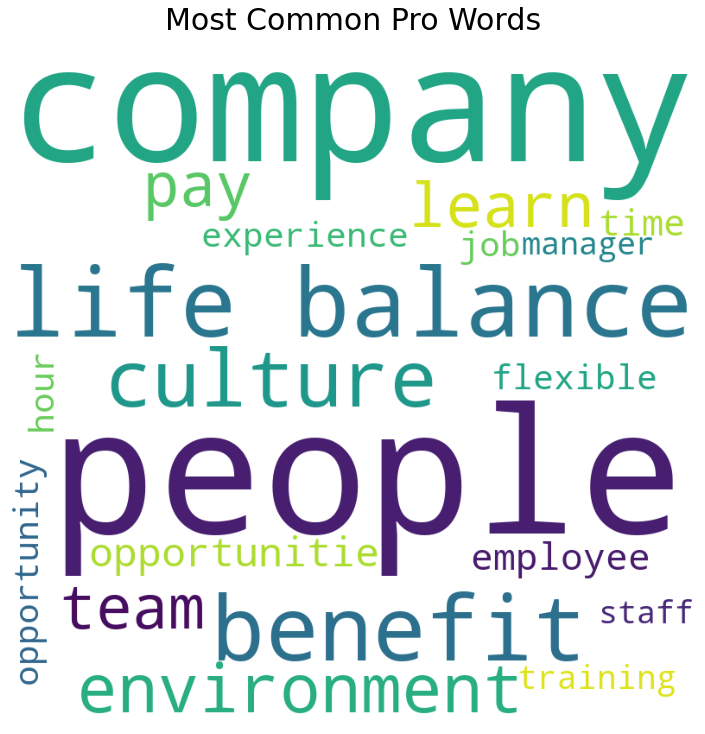

In [53]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(pro_wordcloud)
plt.title("Most Common Pro Words",fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [54]:
# create the con word cloud
con_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 20,
                colormap = 'inferno',
                min_font_size = 10).generate(cons)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Most Common Con Words')

(-0.5, 799.5, 799.5, -0.5)

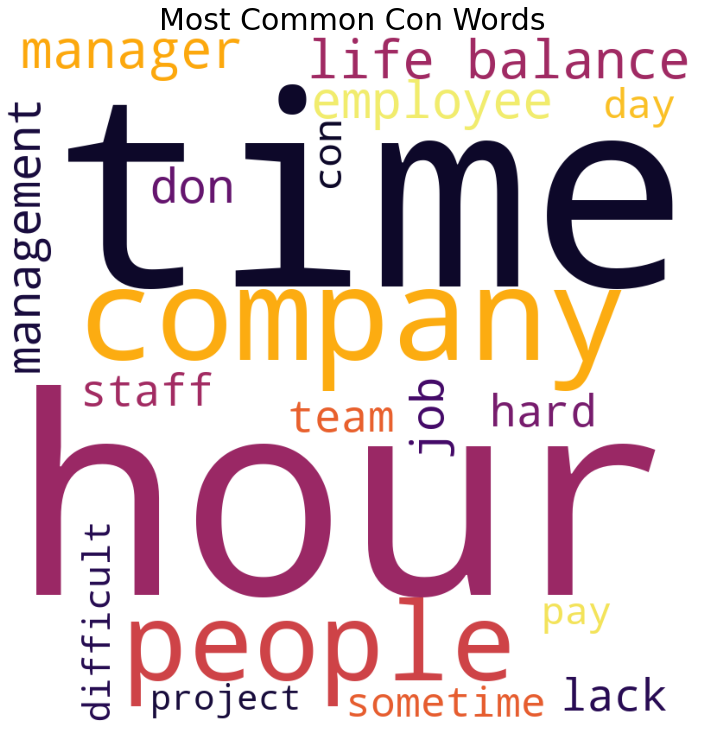

In [55]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(con_wordcloud)
plt.title("Most Common Con Words",fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### When we compare the two word clouds (pros shown 

When we compare the two word clouds we see that the people, company, manager, life balance, and staff appear the most often on both lists.
These factors can either make or break a company so management should focus heavily on these areas. For example, investing in HR and recruiting to make sure that the managers and people that are hired are a good fit for the company.

When we look at the pros word cloud we see that training and opportunity appears (whereas not in the cons). This tells us that if companies want to improve their overall rating, they should focus on offering their employees plans to grow their career such as through continued professional education and ongoing trainings. 

For the cons word cloud we see that time and hour appear the most and therefore firms should try to limit their employees working overtime and again focus on resource planning and operations in order to make sure that their employees are not being spread too thin.

# 5.2 Investigate the difference in these  bigtech comanies: Apple, Google, and Microsoft, Salesforce, Oracle, and IBM.


### As students in the business analytics field, we want to analyze what tech firms may potentially be the best and worst to work at based on the variables in the data.

In [56]:
#First, we look at all of the most counted firms in the dataset using the value_counts code.
df.firm.value_counts().nlargest(25)


ibm                       45670
deloitte                  35269
mcdonald-s                32997
ey                        25795
oracle                    24748
pwc                       23820
microsoft                 19356
j-p-morgan                19332
kpmg                      17953
apple                     15933
citi                      14141
sap                       12060
hsbc-holdings             10604
google                    10513
tesco                      8832
marriott-international     8102
thomson-reuters            7405
barclays                   7369
american-express           7288
vodafone                   6833
salesforce                 6739
morgan-stanley             6414
goldman-sachs              6084
pizza-hut                  5561
bny-mellon                 5095
Name: firm, dtype: int64

#### After reviewing the amount of data we have for the top 25 most firms, we decided to use apple, google, oracle, ibm, salesforce and microsoft as our big tech companies to analyze.

In [57]:
bigtech = df [(df.firm == 'apple') \
              |(df.firm == 'google') \
              |(df.firm == 'microsoft')\
              |(df.firm == 'salesforce')\
              |(df.firm == 'oracle')\
              |(df.firm == 'ibm')]
len(bigtech)

122959

In [58]:
len(bigtech)/len(df) # the bigtech firms make up about 19% of our data 

0.19290439890243155

#### After creating a subset of the data of Big Tech Firms, there is about 122,529 rows that represents around 19% of the total dataset.

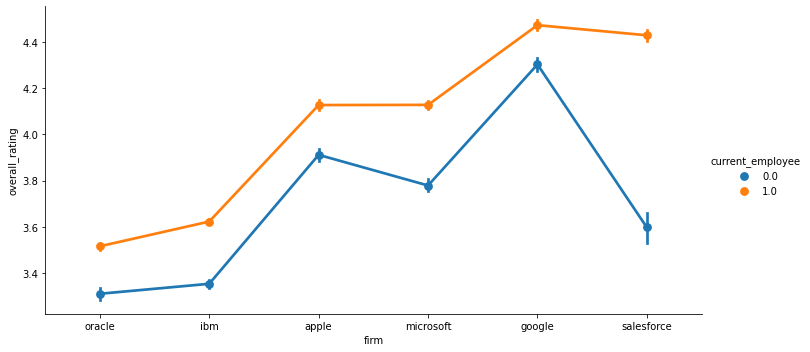

In [59]:
#This scatterplot to show current and former employees in those big tech firms
sns.catplot(x='firm', \
            y= 'overall_rating', \
            hue='current_employee', \
            kind= 'point', \
            data=bigtech, \
            aspect=2)

### Additional Finding... At Salesforce, we found that former employees is dramatically worse than current employees. We can see that current employees, taking a value of 1, have a generally higher overall_rating over former employees. This may be biased in that former employees have reasons on leaving the company, which results in a more negative rating. 

## Our team deduced that Google is the best highest rating of current employees, where as Oracle and IBM has the worst rating of employees in general.

In [60]:
#As data analysts, we want to investigate what companies have the happier analyst
bigtech.job_title.value_counts()

 anonymous employee               34097
 software engineer                 4650
 senior software engineer          1937
 specialist                        1565
 applications developer            1314
                                  ...  
 software technical support           1
 senior it delivery executive         1
 account integration architect        1
 client services procurement          1
 ebr                                  1
Name: job_title, Length: 12379, dtype: int64

In [61]:
bigtech['analyst'] = bigtech.job_title.str.contains('analyst') * 1.0

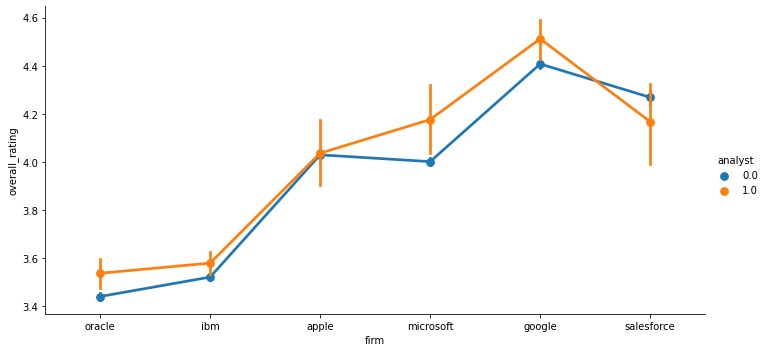

In [62]:
#This scatterplot to show analyst employees in the big tech firms
sns.catplot(x='firm', \
            y= 'overall_rating', \
            hue='analyst', \
            kind= 'point', \
            data=bigtech, \
            aspect=2)

### This graph, we can see that the analyst working at google and salesforece has generally higher overall_rating than analysts working at microsoft and apple. In addition, we see that anayst are overall generally happier at Google compared to other firms.

### Additionally, we saw Salesforce having a large decrease from current employees to former employees. We discover non-analyst roles at Salesforce are happier than analyst roles.

In [63]:
bigtech.groupby('firm').mean().sort_values(by='overall_rating')

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,high_rating,current_employee,analyst
firm,,,,,,,,,,,,
oracle,3.446339,3.782003,3.259374,3.274244,3.203976,3.001333,0.269678,0.227493,0.281477,0.515112,0.663043,0.050307
ibm,3.524940,3.647690,3.536238,3.448106,3.111561,2.976330,0.275476,0.176812,0.161222,0.548434,0.637114,0.048719
microsoft,4.003410,3.708359,3.850124,3.829149,4.056107,3.408607,0.621771,0.549855,0.556623,0.744834,0.642695,0.009661
apple,4.030063,3.423712,4.141091,3.532229,4.143727,3.521998,0.578736,0.611435,0.563171,0.746313,0.548610,0.013682
salesforce,4.266212,3.969877,4.367859,4.144383,4.400505,3.941089,0.687491,0.767770,0.735272,0.809319,0.803680,0.023891
google,4.411110,4.097784,4.347094,4.138020,4.460478,3.952915,0.717017,0.610863,0.668411,0.871968,0.633406,0.036051


# Interpretation 
1. We find that the former and current employees from Salesforce have a significant variation.
2. The firms that have the worst senior management scores are Oracle and IBM
3. IBM has the worst senior management, company benefits, ceo approval rating

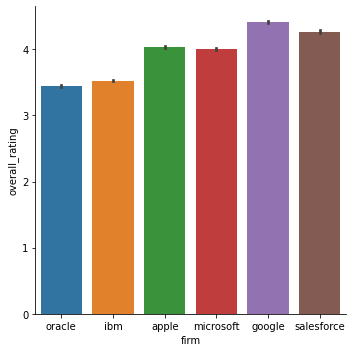

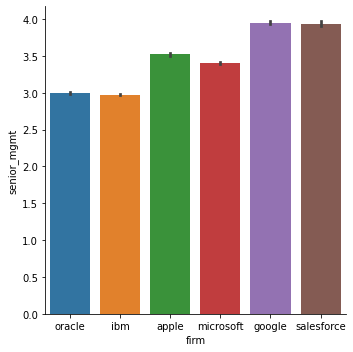

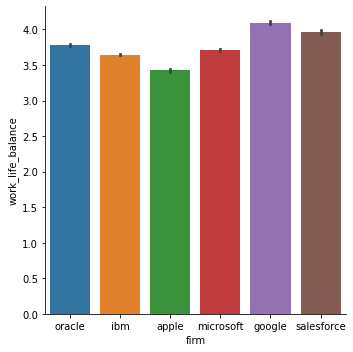

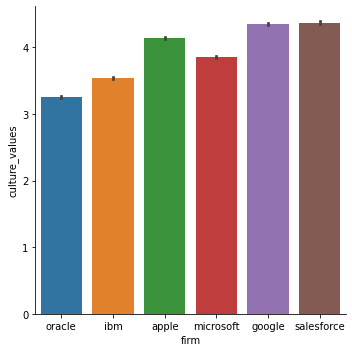

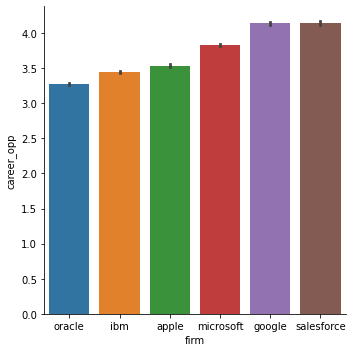

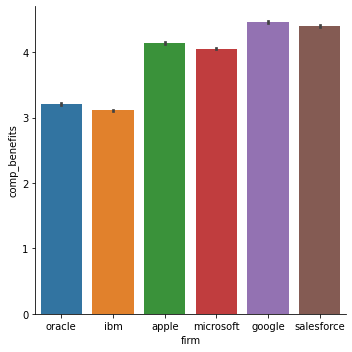

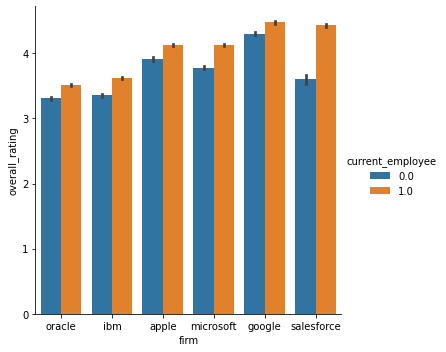

In [64]:
sns.catplot(x='firm',y='overall_rating',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='senior_mgmt',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='work_life_balance',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='culture_values',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='career_opp',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='comp_benefits',data=bigtech,kind='bar',aspect=1)
sns.catplot(x='firm',y='overall_rating',hue='current_employee',data=bigtech,kind='bar',aspect=1)

In [65]:
bigtech.groupby('firm').overall_rating.mean().sort_values(ascending=False)

firm
google        4.411110
salesforce    4.266212
apple         4.030063
microsoft     4.003410
ibm           3.524940
oracle        3.446339
Name: overall_rating, dtype: float64

### From these bar graphs, we can conclude that Google is the best among all categories. Google ranks the best to work at where overall rating average is 4.4, whereas Oracle ranks the worst at 3.4. This is almost a whole rating variation between the best and worst firms.

### Overall, Google has the higest overall rating and Oracle has the lowest. Let's test to see why this is.

In [66]:
google = bigtech[bigtech.firm == 'google']
google.mean().sort_values(ascending=False)

comp_benefits        4.460478
overall_rating       4.411110
culture_values       4.347094
career_opp           4.138020
work_life_balance    4.097784
senior_mgmt          3.952915
high_rating          0.871968
recommend            0.717017
outlook              0.668411
current_employee     0.633406
ceo_approv           0.610863
analyst              0.036051
dtype: float64

In [67]:
oracle = bigtech[bigtech.firm == 'oracle']
oracle.mean().sort_values(ascending=False)

work_life_balance    3.782003
overall_rating       3.446339
career_opp           3.274244
culture_values       3.259374
comp_benefits        3.203976
senior_mgmt          3.001333
current_employee     0.663043
high_rating          0.515112
outlook              0.281477
recommend            0.269678
ceo_approv           0.227493
analyst              0.050307
dtype: float64

In [68]:
#Test to see the variation or difference between variables
(google.mean() - oracle.mean()).sort_values(ascending=False)

comp_benefits        1.256501
culture_values       1.087720
overall_rating       0.964771
senior_mgmt          0.951582
career_opp           0.863775
recommend            0.447339
outlook              0.386933
ceo_approv           0.383370
high_rating          0.356856
work_life_balance    0.315781
analyst             -0.014256
current_employee    -0.029637
dtype: float64

### We see that company benefits and culture/values have the biggest difference from people who work at Google compared to those who work at Oracle.

Let's test to see why there is such a big variation between Google and Oracle rating. We want to explore the reason for Google being the best rated Oracle the lowest by looking at the pros and cons columns.

In [69]:
Google = bigtech[bigtech.firm == 'google']
Oracle = bigtech[bigtech.firm == 'oracle']

In [70]:
Google.loc[:,['pros','cons']][:10]

,pros,cons
782466,everything is so amazing word,none is a word too
782468,good place to work great benefits,still has the corporate culture
782469,"leader in employee wellness , leader in qualit...",hard to get consensus to lead big projects
782470,go to work at and pay good,"it’s hard, and get your mind thinging"
782471,"working with really smart committed people, gr...",late evenings interacting with west coast coll...
782472,wonderful people and a great work environment.,no cons to speak of.
782473,the scale and impact is amazing for design,it can be tricky for content designers to show...
782474,it has a good working environment.,there is no obvious cons overall.
782475,smart people to work with every day\r\npeople ...,senior management is all in mountain view. lim...
782476,wonderful people and a great work environment.,no cons to speak of.


In [71]:
Oracle.loc[:,['pros','cons']][:10]

,pros,cons
239814,"great work place ,good learning","timings are not flexible,should focus on emplo..."
239815,strong principles make great companies! workin...,none. so far so good
239817,great work culture. open culture to interact d...,too much bounded by inhouse technologies. very...
239819,"good projects, lot of opportunities to learn a...",salary revisions are not timely
239821,good env to work in company,no benefits in the company
239822,flexible and friendly environment good place f...,pay has to be revised
239823,work / life balance\r\nco-worker collaboration,extremely rare raises / promotions.\r\nexpecte...
239824,work-life balance is really good,one cannot expect consistent hike every year
239825,great learning experience. get to interact wit...,sometimes there is too much of work on an indi...
239827,lots of opportunity to learn about sales,would like better snacks provided


We will compare the pros of Google and cons of Oracle by using a wordcloud.

### Google Pros Word Cloud

In [72]:
# save values in 'pros' column to a list that we can use
googlepros = []

for line in Google.pros.values:
    googlepros.append(line)
    
# convert to string so cleaning steps can be performed
googlepros = str(googlepros).strip(':;[]-\\&?/.,!?#\"\'0123456789 ')

In [73]:
 # append words to a list
googlepros_words = googlepros.split()

In [74]:
cleaned_googlepros_words = []
for a in range(len(googlepros_words)):
    if googlepros_words[a] not in cleaned_stop_words:
        cleaned_googlepros_words.append(googlepros_words[a])

In [75]:
googlepros_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 30,
                colormap = 'inferno',
                min_font_size = 10).generate(googlepros)

### Oracle Cons Word Cloud

In [76]:
# save values in 'cons' column to a list that we can use
oraclecons = []

for line in Oracle.cons.values:
    oraclecons.append(line)
    
# convert to string so cleaning steps can be performed
oraclecons = str(oraclecons).strip(':;[]-\\&?/.,!?#\"\'0123456789 ')

In [77]:
# append words to a list
oraclecons_words = oraclecons.split()

In [78]:
cleaned_oraclecons_words = []
for a in range(len(oraclecons_words)):
    if oraclecons_words[a] not in cleaned_stop_words:
        cleaned_oraclecons_words.append(oraclecons_words[a])

In [79]:
oraclecons_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 30,
                colormap = 'inferno',
                min_font_size = 10).generate(oraclecons)

<Figure size 720x720 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'ORACLE CON WORDS')

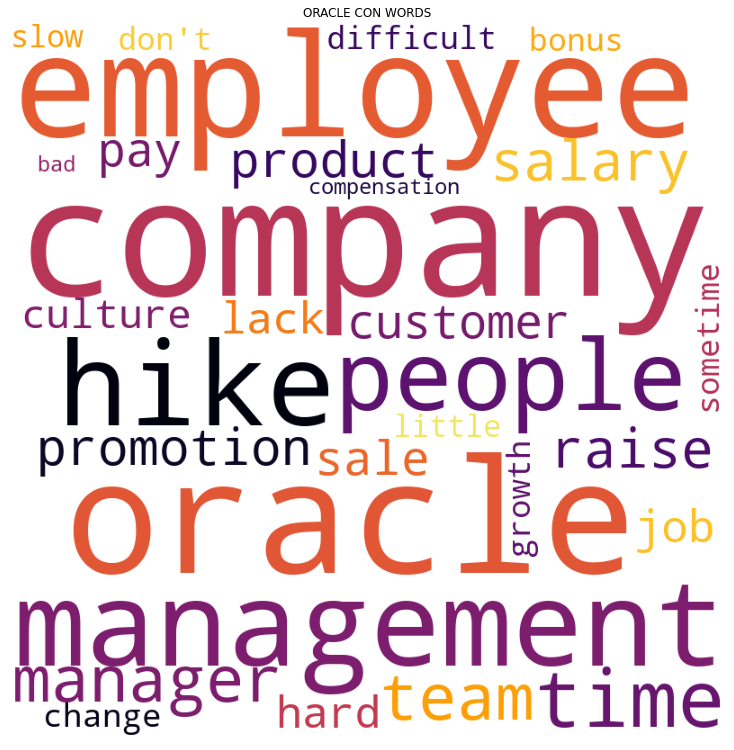

In [80]:
#Oracle Cons Word Cloud
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(oraclecons_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('ORACLE CON WORDS')
 
plt.show()

<Figure size 720x720 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'GOOGLE PRO WORDS')

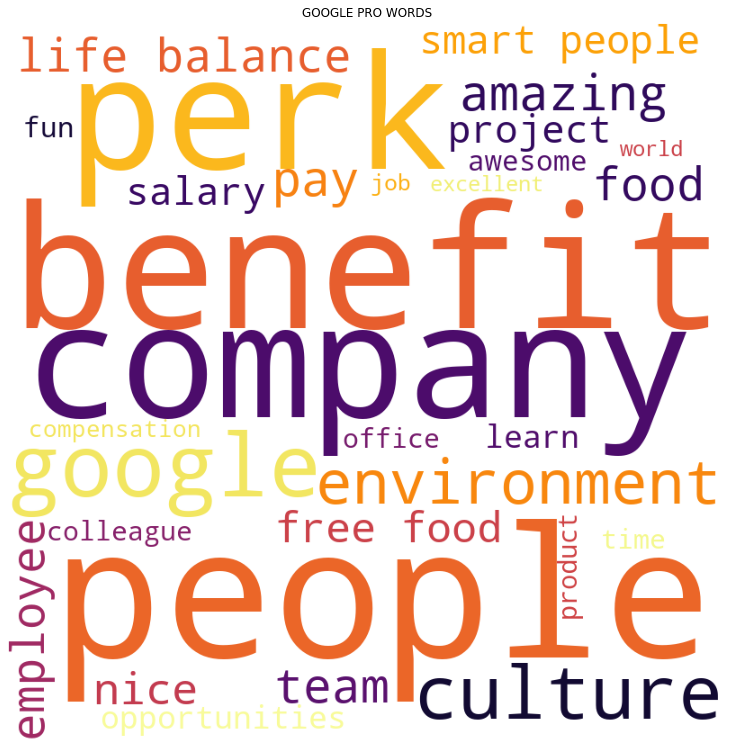

In [81]:
#Google PROS WordCloud
# plot the WordCloud for IBM image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(googlepros_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('GOOGLE PRO WORDS')
 
plt.show()

### Observations 
Oracle: The most common con words that appear are related to management, salary/compensation, and promotion/growth. 

Google: The most common pro words that appear are related to the benefits, people, work life balance, culture and environment.

### Managerial Recommendation among Big Tech Firms
1. The best big tech firm to work for is Google and the worst is Oracle. They mainly differ in company benefits and culture/values. 

2. Employees at Oracle most often list management, salary/compensation and promotion and growth as the cons. Therefore, Oracle should focus on these areas to improve job satisfaction.

3. Employees at Google most often list benefits, people, work life balance, culture and environment as the pros. Oracle can also try to focus on these areas in order to increase job satisfaction.

## 5.3 Machine Learning: What affects the overall rating?

In [82]:
df3 = df.copy()

In [83]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [84]:
df3['high_rating'] = (df3.overall_rating >= 4) * 1.0
df3.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,current_employee
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0.0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1.0,0.0


In [85]:
df3.head()

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,current_employee
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0.0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1.0,0.0
3,sotheby-s,2021-05-24,client services representative,"Former Employee, more than 1 year","london, england, england",4,5.0,4.0,5.0,4.0,5.0,1,1,1,"fast-paced, difficult and rewarding","good team, support and training",high-stress with relatively low conpensation,1.0,0.0
4,sotheby-s,2021-05-22,anonymous employee,Current Employee,hong kong,3,2.0,2.0,3.0,2.0,3.0,0,0,0,review,"exposure to artworks, great team of specialists","work life balance, company culture",0.0,1.0
5,sotheby-s,2021-05-15,administrator,"Current Employee, less than 1 year","london, england, england",4,4.0,4.0,3.0,3.0,3.0,1,0,1,fun job and nice people but huge workload and ...,"fantastic art, nice enthusiastic people and a ...",very low pay and huge workload,1.0,1.0


In [86]:
df_dt =df3.drop(columns = ['firm','date_review','job_title','work_status','location',\
                           'headline','pros','cons','current_employee',\
                          'recommend','ceo_approv','outlook','overall_rating'])
df_dt.head()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,high_rating
1,1.0,1.0,1.0,2.0,1.0,0.0
2,4.0,5.0,3.0,4.0,4.0,1.0
3,5.0,4.0,5.0,4.0,5.0,1.0
4,2.0,2.0,3.0,2.0,3.0,0.0
5,4.0,4.0,3.0,3.0,3.0,1.0


In [87]:
df_dt.groupby('high_rating')['high_rating'].count()

high_rating
0.0    251866
1.0    385543
Name: high_rating, dtype: int64

In [88]:
X = df_dt.drop(columns='high_rating')
Y = df_dt.high_rating

In [89]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

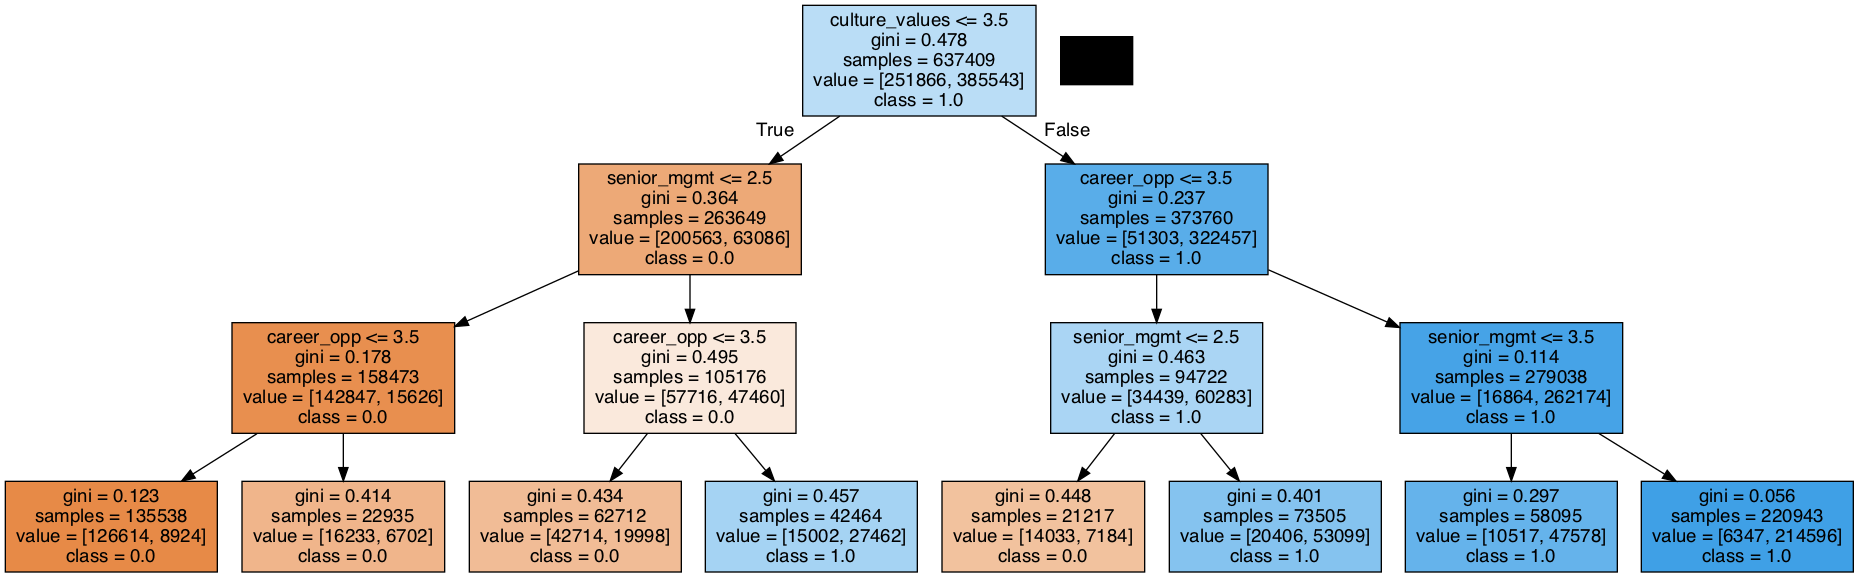

In [90]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Interpretation
1. When the company has "high culture values" and "high career opportunities", no matter if the senior management if high or low, it is likely that the company will have a high overall rating. 
2. When the company has "high culture values", even if their career opportunities are low, the company will have a high overall rating once their "senior management" is high.
3. We conclude the most important factors that firms have a high overall rating are "high culture values". So, firms should improve their culture values to have a better overall rating. But they should also care about some important factors such as "career opportunities" and "senior management". 

### Validating the findings

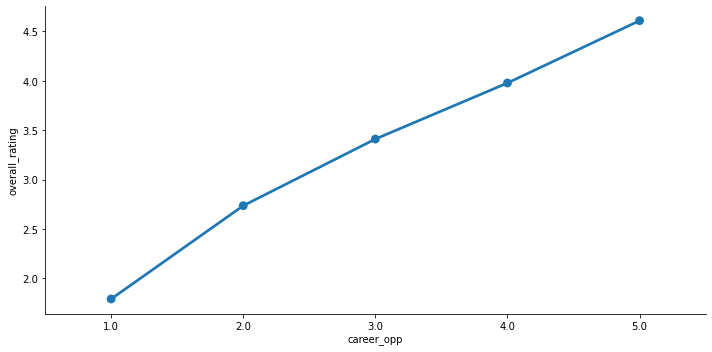

In [91]:
# check if career_opp has positive effect on overall_rating
sns.catplot(x='career_opp', y= 'overall_rating', kind= 'point', data=df3, aspect=2)

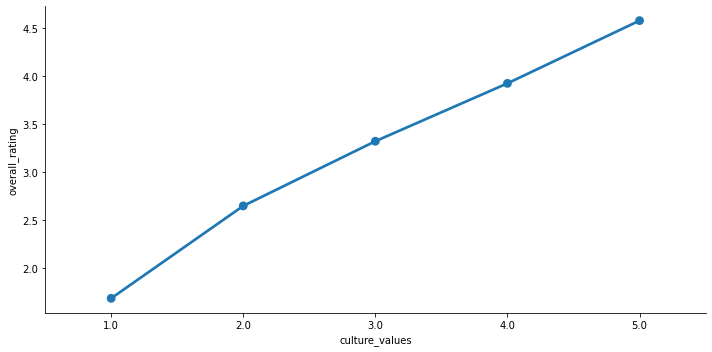

In [92]:
# check if culture_values has positive effect on overall_rating
sns.catplot(x='culture_values', y= 'overall_rating', kind= 'point', data=df3, aspect=2)

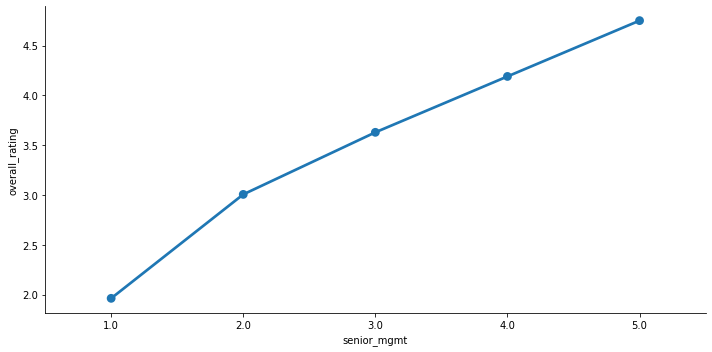

In [93]:
# check if senior_mgmt has positive effect on overall_rating
sns.catplot(x='senior_mgmt', y= 'overall_rating', kind= 'point', data=df3, aspect=2)

### Random forest

In [94]:
from sklearn.model_selection import train_test_split
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [95]:
# Check the length
len(X)
len(X_train)
len(X_test)
len(X_train) / float (len(X))

637409

446186

191223

0.699999529344581

In [96]:
(len(X_train) + len(X_test)) == len(X)

True

In [97]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

### Predict the test set

In [98]:
cl.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [99]:
(cl.predict(X_test) == Y_test).mean()

0.8653247778771382

In [100]:
y_pred = cl.predict(X_test)

In [101]:
y_pred[:20]

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1.])

In [102]:
cl.predict_proba(X_test)

array([[0.8517417 , 0.1482583 ],
       [0.9878449 , 0.0121551 ],
       [0.7298588 , 0.2701412 ],
       ...,
       [0.86591108, 0.13408892],
       [0.87945452, 0.12054548],
       [0.42148612, 0.57851388]])

In [103]:
y_pred_proba = cl.predict_proba(X_test)[:,1]
y_pred_proba[:20]

array([0.1482583 , 0.0121551 , 0.2701412 , 0.99464674, 0.93373493,
       0.02746466, 0.97507051, 0.09414175, 0.99227624, 0.65016508,
       0.98942457, 0.97251969, 0.60239478, 0.99227624, 0.99578374,
       0.34423145, 0.19815538, 0.96462857, 0.99285296, 0.89418377])

Collect Scores

In [104]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [105]:
# Confusion matrix
confusion_matrix(Y_test,y_pred)

array([[ 62284,  13118],
       [ 12635, 103186]])

In [106]:
# Accuracy
(y_pred == Y_test).mean()
met.accuracy_score(Y_test, y_pred)
Y_test.mean()

0.8653247778771382

0.8653247778771382

0.6056855085423825

In [107]:
# Precision
met.precision_score(Y_test,y_pred,average='micro')

0.8653247778771382

In [108]:
# Recall
met.recall_score(Y_test,y_pred,average='micro')

0.8653247778771382

In [109]:
# AUC score
met.roc_auc_score(Y_test,y_pred_proba,max_fpr=None)

0.9387788509591672

### Clustering

In [110]:
df_clus = df.copy()

In [111]:
df_clus.head(3)
len(df_clus)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,current_employee
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1,0.0
3,sotheby-s,2021-05-24,client services representative,"Former Employee, more than 1 year","london, england, england",4,5.0,4.0,5.0,4.0,5.0,1,1,1,"fast-paced, difficult and rewarding","good team, support and training",high-stress with relatively low conpensation,1,0.0


637409

In [112]:
# Drop columns that contain duplicated or unnecessary information
df_clus.drop('firm', axis=1, inplace=True)
df_clus.drop('date_review', axis=1, inplace=True)
df_clus.drop('job_title', axis=1, inplace=True)
df_clus.drop('work_status', axis=1, inplace=True)
df_clus.drop('location', axis=1, inplace=True)
df_clus.drop('headline', axis=1, inplace=True)
df_clus.drop('pros', axis=1, inplace=True)
df_clus.drop('cons', axis=1, inplace=True)
df_clus.drop('high_rating', axis = 1, inplace = True)
df_clus.drop('current_employee', axis = 1, inplace = True)

Use KMeans to find 3 clusters

In [113]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, random_state=0)

In [114]:
clu.fit(df_clus)

KMeans(n_clusters=3, random_state=0)

In [115]:
clu.labels_

array([2, 1, 1, ..., 1, 0, 0], dtype=int32)

Getting summary information on the clusters' characteristics

In [116]:
df_clus['cluster']= clu.labels_

In [117]:
df_clus.head()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,cluster
1,1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,2
2,4,4.0,5.0,3.0,4.0,4.0,0,0,0,1
3,4,5.0,4.0,5.0,4.0,5.0,1,1,1,1
4,3,2.0,2.0,3.0,2.0,3.0,0,0,0,0
5,4,4.0,4.0,3.0,3.0,3.0,1,0,1,0


In [118]:
df_clus.groupby('cluster').mean()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
cluster,,,,,,,,,
0,3.544663,3.146678,3.474168,3.332511,3.175026,2.914795,0.456217,0.269680,0.282856
1,4.612660,4.260336,4.659556,4.440634,4.280317,4.350632,0.877713,0.641970,0.725772
2,1.934920,2.097635,1.742623,1.914200,2.176966,1.442995,-0.804976,-0.207777,-0.381999


In [119]:
df_clus['low_culture_values']= pd.cut(df_clus.culture_values, bins=[0,2,3,4,5])

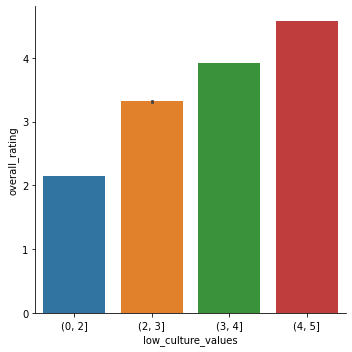

In [120]:
sns.catplot(x='low_culture_values',y='overall_rating',data=df_clus, kind='bar')

In [121]:
df_clus['low_senior_mgmt']= pd.cut(df_clus.senior_mgmt, bins=[0,2,3,4,5])

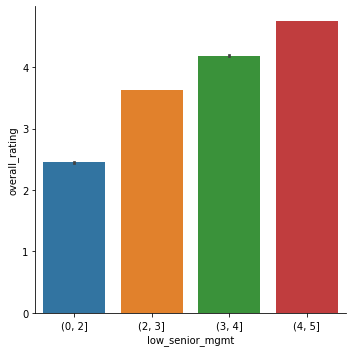

In [122]:
sns.catplot(x='low_senior_mgmt',y='overall_rating',data=df_clus, kind='bar')

In [123]:
df_clus['low_career_opp']= pd.cut(df_clus.career_opp, bins=[0,2,3,4,5])

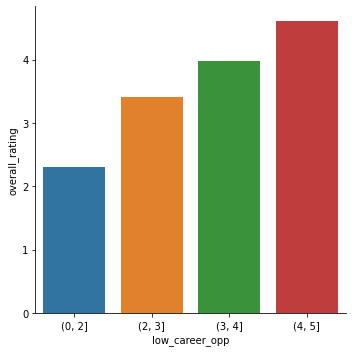

In [124]:
sns.catplot(x='low_career_opp',y='overall_rating',data=df_clus, kind='bar')

### According to the bar chart, if the firms' culture values, senior management, or career opportunities is lower than 4 (1,2,3), then their overall rating would lower than 4.

In [125]:
corr = df_clus.corr()
corr

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,cluster
overall_rating,1.000000,0.563135,0.766156,0.713832,0.612179,0.752702,0.679104,0.475937,0.567377,-0.359457
work_life_balance,0.563135,1.000000,0.553722,0.400237,0.436636,0.542437,0.440146,0.310825,0.346208,-0.183122
culture_values,0.766156,0.553722,1.000000,0.639799,0.542435,0.745391,0.624662,0.469505,0.522865,-0.346726
career_opp,0.713832,0.400237,0.639799,1.000000,0.563377,0.666723,0.557669,0.406760,0.504037,-0.284626
comp_benefits,0.612179,0.436636,0.542435,0.563377,1.000000,0.547935,0.458025,0.367853,0.410428,-0.183200
senior_mgmt,0.752702,0.542437,0.745391,0.666723,0.547935,1.000000,0.598305,0.470113,0.534119,-0.261717
recommend,0.679104,0.440146,0.624662,0.557669,0.458025,0.598305,1.000000,0.484956,0.597501,-0.438982
ceo_approv,0.475937,0.310825,0.469505,0.406760,0.367853,0.470113,0.484956,1.000000,0.519452,-0.195158
outlook,0.567377,0.346208,0.522865,0.504037,0.410428,0.534119,0.597501,0.519452,1.000000,-0.255033
cluster,-0.359457,-0.183122,-0.346726,-0.284626,-0.183200,-0.261717,-0.438982,-0.195158,-0.255033,1.000000


<AxesSubplot:>

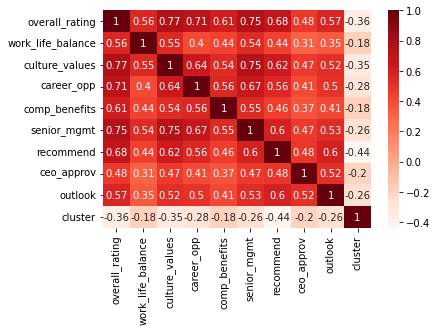

In [126]:
sns.heatmap(corr, annot=True, cmap='Reds')

### According to the heatmap, "culture values", "senior management", and "career opportunities" are highly positive correlated to the overall rating. Our decision tree also used these variables to classify high rating and low rating.

## 6. Interesting Findings:

<b>Finding 1:</b> The most commonly used words in the pros and cons of a company are related to the people, manager, work life balance, and staff. 

For pros specifically, the word opportunity is often used whereas the cons mention time and hour the most.

<b>Finding 2:</b> The best big tech firm to work for is Google, the worst is Oracle.

They mainly differ in company benefits and culture/values. 

Oracle employees often listed management, salary/compensation, promotion and growth as the cons whereas Google employees listed benefits, people, work life balance, culture and environment as the pros.

<b>Finding 3:</b> Based on decision tree, clustering, and heatmap, firms that have a high overall rating often have a high culture values, senior management, and career opportunities.

## 7. Conclusions:

<li> Creating an environment that has good people and a good work life balance is key. Management should focus heavily on HR, recruiting, and resource planning as these areas are often mentioned in the pros and cons of a firm.
</li>
<li> Offer employees ample opportunities for learning and career growth. This can help improve job satisfaction as it is a commonly used word to describe the pros of the company.
</li>
<li> Oracle currently has the worst overall rating among big tech firms, and they can focus on improving relationships between management and staff as well as focus on areas such as compensation and growth. These can be implemented through more reviews and feedback between both management and staff.
</li>
<li> Google is the best big tech firms and other firms can implement some of the perks and benefits that Google provides such as free food. Having a good work life balance is also key to maintain a high overall rating.
</li>
<li> Firms should focus on culture/values, senior management, and career opportunities to improve their overall rating. 
    We will suggest the firms that they could improve their overall rating by improving their culture values. For example, establishing a committee that reviews/implements the everyday culture and values of the firm.
</li>